In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/cleaned-data/Final_PA2_data.csv


In [2]:
from __future__ import division


import spacy
from spacy.tokens.doc import Doc
import inspect
!pip install textacy==0.5.0
from textacy.vsm import Vectorizer
import textacy.vsm

import scipy.sparse as sp



import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string


from tqdm import tqdm

from collections import defaultdict

     |████████████████████████████████| 187 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 3.0 MB/s  eta 0:00:01
     |████████████████████████████████| 3.0 MB 7.8 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 2.2 MB/s  eta 0:00:01
  Created wheel for ftfy: filename=ftfy-4.4.3-py3-none-any.whl size=41068 sha256=eef63fd1f112c2aebf8ce455b00b4f176a2e64e7a668f29dc3a8afc52182152c
  Stored in directory: /root/.cache/pip/wheels/f1/47/dc/48b860b321b7dda1073ced6eaea164a6b94f25936b10eba32f
Successfully built ftfy
ERROR: allennlp 0.9.0 has requirement spacy<2.2,>=2.1.0, but you'll have spacy 2.2.3 which is incompatible.
  Attempting uninstall: ftfy
    Found existing installation: ftfy 5.7
    Uninstalling ftfy-5.7:
      Successfully uninstalled ftfy-5.7


/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [4]:

df = pd.read_csv("../input/cleaned-data/Final_PA2_data.csv")

In [5]:
df.shape
#train - (7613, 5), test - (3262, 4)

(10876, 5)

In [93]:
train = df[0:7612]
test = df[7613:10875]

In [94]:
train.head()

,id,keyword,location,target,lemmatize_without_stopwords
0,1,NaN,NaN,1.0,deed reason earthquake may allah forgive us
1,4,NaN,NaN,1.0,forest fire near la ronge sask canada
2,5,NaN,NaN,1.0,resident ask shelter place notify officer evac...
3,6,NaN,NaN,1.0,people receive wildfire evacuation order calif...
4,7,NaN,NaN,1.0,get sent photo ruby alaska smoke wildfires pou...


In [99]:
test.iloc[13,]

id                              43
keyword                        NaN
location                       NaN
target                         NaN
lemmatize_without_stopwords    NaN
Name: 7626, dtype: object

In [96]:
test['lemmatize_without_stopwords'].isna().sum()

1

In [97]:
temp = list(pd.isna(test['lemmatize_without_stopwords']))
temp.index(True)

13

In [86]:
test[test['lemmatize_without_stopwords']==na]

NameError: name 'na' is not defined

In [10]:
nlp = spacy.load('en')

Tokenizing with Spacy

In [44]:
spacy_tweets = []

for doc in nlp.pipe(train.lemmatize_without_stopwords, n_threads = -1):
    spacy_tweets.append(doc)
spacy_tweets

[deed reason earthquake may allah forgive us,
 forest fire near la ronge sask canada,
 resident ask shelter place notify officer evacuation shelter place order epected,
 people receive wildfire evacuation order california,
 get sent photo ruby alaska smoke wildfires pour school,
 rockyfire update california hwy close direction due lake county fire cafire wildfire,
 flood disaster heavy rain cause flash flood street manitou colorado spring area,
 im top hill see fire wood,
 emergency evacuation happen building across street,
 im afraid tornado come area,
 three people die heat wave far,
 haha south tampa get flood hah wait second live south tampa gon na gon na fvck flooding,
 rain flood florida tampabay tampa day ive lose count,
 flood bago myanmar arrive bago,
 damage school bus multi car crash breaking,
 whats man,
 love fruit,
 summer lovely,
 car fast,
 goooooooaaaaaal,
 ridiculous,
 london cool,
 love skiing,
 wonderful day,
 looooool,
 wayi cant eat shit,
 nyc last week,
 love gir

Getting the tf-idf values of content words

In [12]:
useful_entities = [u'NORP', u'FACILITY', u'ORG', u'GPE', u'LOC', u'EVENT', u'DATE', u'TIME']

In [13]:
def create_corpus(df):
    corpus=[]
    
    for x in df['lemmatize_without_stopwords'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [14]:
corpus = create_corpus(train)


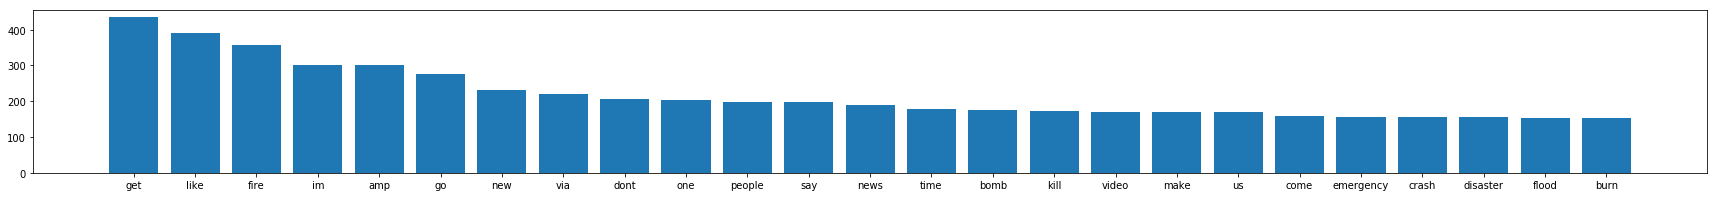

In [38]:
dic=defaultdict(int)
for word in corpus:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:25] 
    


x,y=zip(*top)
plt.bar(x,y)
plt.rcParams["figure.figsize"] = (30,5)

In [16]:
main_words = ['fire', 'news', 'bomb','kill','emergency','crash','disaster','flood','burn']

In [17]:
content_tweets = []
for single_tweet in tqdm(spacy_tweets):
    single_tweet_content = []
    for token in single_tweet: 
        if ((token.ent_type_ in useful_entities)  
            or (token.pos_ == u'NUM') 
            or (token.lower_ in main_words)):
            single_tweet_content.append(token)
    content_tweets.append(single_tweet_content)

100%|██████████| 7612/7612 [00:00<00:00, 35263.81it/s]


So this has already gone some way to (crudely) isolating the interesting parts of a tweet.

SpaCy does not calculate tf-idf score automatically. We usetextacy. Note: textacy is built on SpaCy.

I care about the tf-idf scores of the entire tweet, so will find the tf-idf score across the entire corpus of original tweets.

In [19]:
vectorizer = Vectorizer(weighting = 'tfidf')

To calculate the tf-idf score of all the tokens in the tweets, I can use fit_transform().

Note: We are using the lemma_ attribute of each token, because tokens contain information about the documents. This means that 'fire' in the 100th tweet will have a different token from 'fire' in the 200th tweet, but the same lemma__ attribute. This is what we want to compare - we don't want hundreds of 'fire' columns in the term matrix.

In [20]:
term_matrix = vectorizer.fit_transform([tok.lemma_ for tok in doc] for doc in spacy_tweets)

In [21]:
term_matrix

<7612x14566 sparse matrix of type '<class 'numpy.float64'>'
	with 68113 stored elements in Compressed Sparse Row format>

This matrix is a term-document matrix. What this means is that on top of having the tf-idf values, each row is a document (and each column is a word).

If the tweet in row i contains the column in row j, then the element matrix[i][j] will contain the tf-idf value. If the tweet doesn't contan the word, the matrix value will be zero.

In [24]:
np_matrix = term_matrix.todense()

In [30]:
np_matrix.shape

(7612, 14566)

The goal is to create a dictionary, which maps from the tokens in the content tweets to some tf-idf score. To do this, we find out which tokens are at what columns in the term matrix.

The vectorizer object has a dictionary, which maps token.lemma_ to its column.
And each column (word) has a unique tf-idf value.

I can therefore map the value of the content tokens to their tf-idf, using the vectorizer.vocabulary dictionary.

In [26]:
tfidf_dict = {}
content_vocab = []
for tweet in content_tweets: 
    for token in tweet: 
        if token.lemma_ not in tfidf_dict: 
            content_vocab.append(token.lemma_)
            tfidf_dict[token.lemma_] = np.max(np_matrix[:,vectorizer.vocabulary[token.lemma_]])

In [31]:
tfidf_dict

{'fire': 24.831119621074123,
 'california': 10.368044800399696,
 'alaska': 7.858171049626376,
 'lake': 14.459124780408006,
 'county': 12.600052863159654,
 'flood': 14.80099885608226,
 'disaster': 10.064675625735566,
 'colorado': 14.330047738132862,
 'spring': 6.993173612139772,
 'emergency': 9.814349339827555,
 'three': 13.283551450603767,
 'haha': 6.89309015358279,
 'south': 13.210816162262018,
 'tampa': 17.102636460372644,
 'florida': 7.740388013969993,
 'myanmar': 14.094481666820096,
 'crash': 14.780931891629871,
 'summer': 12.3528249512253,
 'london': 7.104399247249996,
 'nyc': 7.372663233844676,
 'last': 16.484884004447686,
 'week': 6.153422957387951,
 'bbcmtd': 9.244465410746267,
 'newsnigeria': 9.244465410746267,
 'night': 12.051179171756132,
 'epl': 9.244465410746267,
 'inec': 8.839000302638102,
 'office': 7.165023869066431,
 'abia': 8.839000302638102,
 'jamaica': 8.145853122078158,
 'two': 10.831648028514344,
 'santa': 7.991702442250899,
 'cruz': 7.539717318507842,
 'cfc': 8.8

In [32]:
tfidf_df = pd.DataFrame(np_matrix)

In [34]:
tfidf_df['target'] = train['target']
tfidf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,14557,14558,14559,14560,14561,14562,14563,14564,14565,target
0,8.839,6.503625,6.087465,5.246265,7.740388,7.991702,3.476144,0.00000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.77873,4.13852,5.912261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [35]:
tfidf_df.to_csv(r'C:\Users\ganap\Desktop\MSiA Quarter 2\PA 2 DA\tfidf_df.csv')

Doing All these steps for the test data also

In [62]:
test['lemmatize_without_stopwords'].dropna(inplace=True)


In [63]:
spacy_tweets_test = []

for doc in nlp.pipe(test.lemmatize_without_stopwords, n_threads = -1):
    spacy_tweets_test.append(doc)

In [65]:
test_matrix = vectorizer.transform([tok.lemma_ for tok in doc] for doc in spacy_tweets_test)

In [66]:
test_np_matrix = test_matrix.todense()

In [68]:
test_df = pd.DataFrame(test_np_matrix)

In [100]:
tfidf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,14556,14557,14558,14559,14560,14561,14562,14563,14564,14565
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,6.045573,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,5.426534,4.086149,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
test_df.to_csv(r'C:\Users\ganap\Desktop\MSiA Quarter 2\PA 2 DA\test_df.csv')

(3261, 14566)